In [2]:
import nltk

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
from gensim.models import Word2Vec

## word2vec
Before learning about word2vec, the concept of **word embedding** is highly required.  

#### Word Embedding
Word embedding is nothing but a feature extracting technique where words are represented in numerical forms (vectors) that can be used by computers for further process. In order words, it is one of the means to encode textual data into 
vector representation. Some feature representations of text can be:
- one hot encoding
- term frequence
- tf-idf

The main problem with these features is that they are not able to fully encode the actual meaning of the text. ANd also not to forget that text manipuation cannot be done with such features. Moreover, since textual data is highly concentrated to some type of **concepts**, it is required to encode these data into a **concept space** where similar words/tokens/documents occupy some regions of the space. 

Think of this concept space as 3 dimensional space (although it is a **n** dimensional space) where every point represent word/token/document.

In such space, the encodings for **cat**, **tiger**, etc may lie in same cluster. Hence, giving us the information that those are related tokens.

### So, what is word2vec?
**word2vec** is nothing but a machine learning technique (to be more precise, it is a set of models) to produce word embeddings. Each vector is a set of floating point number that be used for various mathematical calculation.

#### Example
Using word2vec, we can do some amazing vector arithmetic like:
- man - woman + king ≈ queen
- paris - france + italy ≈ rome


Each term in the equation is a vector representation of that token

In [4]:
documents = [
    "i am nish. i am paradox. i am gru",
    "i love coffee. coffee is life. i am caffeine addict. me without caffeine is like a dead man",
    "i like to go into deep conversation related to life and shit",
    "life is itself a paradox for me."
    ]

In [5]:
# tokenize
tokens = [nltk.word_tokenize(doc) for doc in documents]
tokens

[['i', 'am', 'nish', '.', 'i', 'am', 'paradox', '.', 'i', 'am', 'gru'],
 ['i',
  'love',
  'coffee',
  '.',
  'coffee',
  'is',
  'life',
  '.',
  'i',
  'am',
  'caffeine',
  'addict',
  '.',
  'me',
  'without',
  'caffeine',
  'is',
  'like',
  'a',
  'dead',
  'man'],
 ['i',
  'like',
  'to',
  'go',
  'into',
  'deep',
  'conversation',
  'related',
  'to',
  'life',
  'and',
  'shit'],
 ['life', 'is', 'itself', 'a', 'paradox', 'for', 'me', '.']]

In [6]:
# train model
model = Word2Vec(tokens, min_count=1, size=2)
print(model)

# access vocabulary
words = list(model.wv.vocab)
print(words)

Word2Vec(vocab=28, size=2, alpha=0.025)
['i', 'am', 'nish', '.', 'paradox', 'gru', 'love', 'coffee', 'is', 'life', 'caffeine', 'addict', 'me', 'without', 'like', 'a', 'dead', 'man', 'to', 'go', 'into', 'deep', 'conversation', 'related', 'and', 'shit', 'itself', 'for']


In [7]:
# access vector
print(model['nish'])
print(model['gru'])
print(model['paradox'])

[-0.2400958   0.02093609]
[-0.03497658  0.08280171]
[0.22861105 0.18768336]


/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [8]:
# save model
model.save('data/paradoxicalmodel.bin')

# load model
new_model = Word2Vec.load('data/paradoxicalmodel.bin')
print(new_model)

Word2Vec(vocab=28, size=2, alpha=0.025)


['i', 'am', 'nish', '.', 'paradox', 'gru', 'love', 'coffee', 'is', 'life', 'caffeine', 'addict', 'me', 'without', 'like', 'a', 'dead', 'man', 'to', 'go', 'into', 'deep', 'conversation', 'related', 'and', 'shit', 'itself', 'for']
[[-0.248803   -0.193855  ]
 [-0.09669492  0.04684785]
 [-0.2400958   0.02093609]
 [-0.08202514 -0.02138234]
 [ 0.22861105  0.18768336]
 [-0.03497658  0.08280171]
 [ 0.17749889 -0.06015008]
 [-0.22555803 -0.08973821]
 [-0.09323301 -0.08995545]
 [-0.19806302 -0.2499276 ]
 [ 0.13824627  0.127808  ]
 [ 0.2124082   0.22289233]
 [-0.19358931 -0.0439013 ]
 [-0.07380816  0.18490836]
 [ 0.05871503  0.00749385]
 [-0.05825228 -0.09508781]
 [-0.01512721  0.02311985]
 [-0.08053851  0.17686458]
 [-0.01979793  0.00121031]
 [-0.07582299 -0.0517593 ]
 [-0.10207701 -0.06615554]
 [-0.1806654  -0.2151306 ]
 [-0.14659494 -0.1115877 ]
 [ 0.05606684 -0.07784493]
 [-0.07708518  0.06315464]
 [-0.10067043  0.23128521]
 [-0.21931466  0.0729467 ]
 [-0.00464101 -0.22324654]]


/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


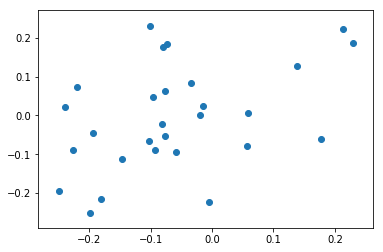

In [9]:
# visualize
print(words)
vectors = model[words]
print(vectors)
X = vectors[:, 0]
Y = vectors[:, 1]
plt.scatter(X, Y)

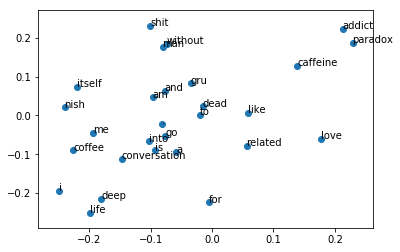

In [10]:
# scatter plot with labelled point
fig, ax = plt.subplots()
ax.scatter(X, Y)

for i, txt in enumerate(words):
    ax.annotate(txt, (X[i],Y[i]))

In [11]:
# find top 'n' similar tokens
model.most_similar(positive=['life'], topn=3)

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('deep', 0.9995967149734497),
 ('a', 0.9927491545677185),
 ('is', 0.991148829460144)]

In [12]:
# word2vec arithmetic

# example -> if i remove coffee from life, there will be no addiction
# so, the similarity of res and addict is negative -> the vectors are far apart (beyond 90 degree)
res = model['life'] - model['coffee']
np.dot(res, model['addict'])

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


-0.02986482